In this Kernel we will exlore the Data Set.Apply NLP techniques like Data Cleaning,Apply Count Vectoriser and Use Naive Bayes Algroithm to do a Sentiment Analysis.This Kernel is work in Process if you Like my Work please do vote.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/yelp-csv/yelp_academic_dataset_business.csv
/kaggle/input/yelp-csv/yelp_academic_dataset_review.csv


**Import Python Modules**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Import the Dataset**

In [3]:
df=pd.read_csv('../input/yelp-csv/yelp_academic_dataset_review.csv')
df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,dr. goldberg offers everything i look for in a...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,5,2007-05-17,review,2
1,H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,"Unfortunately, the frustration of being Dr. Go...",0,vcNAWiLM4dR7D2nwwJ7nCA,0,2,2010-03-22,review,2
2,zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,Dr. Goldberg has been my doctor for years and ...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-02-14,review,1
3,KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,Been going to Dr. Goldberg for over 10 years. ...,0,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-03-02,review,0
4,zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,Got a letter in the mail last week that said D...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-05-15,review,2


**Summary of Data**

In [4]:
print('Rows     :',df.shape[0])
print('Columns  :',df.shape[1])
print('\nFeatures :\n     :',df.columns.tolist())
print('\nMissing values    :',df.isnull().values.sum())
print('\nUnique values :  \n',df.nunique())

Rows     : 1125458
Columns  : 10

Features :
     : ['user_id', 'review_id', 'text', 'votes.cool', 'business_id', 'votes.funny', 'stars', 'date', 'type', 'votes.useful']

Missing values    : 1

Unique values :  
 user_id          252898
review_id       1125458
text            1123496
votes.cool           67
business_id       41958
votes.funny          70
stars                 5
date               3250
type                  1
votes.useful         75
dtype: int64


In [5]:
df.isnull().sum()

user_id         0
review_id       0
text            1
votes.cool      0
business_id     0
votes.funny     0
stars           0
date            0
type            0
votes.useful    0
dtype: int64

In [6]:
df.dropna()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful
0,Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,dr. goldberg offers everything i look for in a...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,5,2007-05-17,review,2
1,H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,"Unfortunately, the frustration of being Dr. Go...",0,vcNAWiLM4dR7D2nwwJ7nCA,0,2,2010-03-22,review,2
2,zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,Dr. Goldberg has been my doctor for years and ...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-02-14,review,1
3,KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,Been going to Dr. Goldberg for over 10 years. ...,0,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-03-02,review,0
4,zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,Got a letter in the mail last week that said D...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-05-15,review,2
...,...,...,...,...,...,...,...,...,...,...
1125453,lhMo-dGq0V2iKqBIiwUJSg,eujuvkGqy2ssZ9zjdPJrMA,"Located at the bottom of Lauriston Place, this...",0,BVxlrYWgmi-8TPGMe6CTpg,0,5,2010-08-11,review,1
1125454,TTrzXCtB2MZA8Azw56bRlw,vFA5KXUGEH-oMcM6WTC-8w,I love this place! I think the staff struggle ...,1,BVxlrYWgmi-8TPGMe6CTpg,2,5,2012-06-15,review,1
1125455,rtS7mDof5d-cEPBsmVuUJw,0sVK4VUxvj3cy78W0DlvWQ,Perfect little shop to go to if you want to pi...,1,BVxlrYWgmi-8TPGMe6CTpg,0,3,2013-09-17,review,2
1125456,tZs84cKAUSOtP_nAiSdreQ,Nx88b_tCsP7Oja3PvhR5tQ,I visit here once or twice a month. Just to ge...,1,BVxlrYWgmi-8TPGMe6CTpg,1,4,2013-09-18,review,1


We have dropped the row for which the review was missing.

In [7]:
df.describe()

,votes.cool,votes.funny,stars,votes.useful
count,1.125458e+06,1.125458e+06,1.125458e+06,1.125458e+06
mean,6.533705e-01,5.250805e-01,3.737435e+00,1.132278e+00
std,1.712005e+00,1.633618e+00,1.299347e+00,2.125121e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00
max,1.370000e+02,1.410000e+02,5.000000e+00,1.660000e+02


We can see that the mean of column stars is 3.73

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125458 entries, 0 to 1125457
Data columns (total 10 columns):
user_id         1125458 non-null object
review_id       1125458 non-null object
text            1125457 non-null object
votes.cool      1125458 non-null int64
business_id     1125458 non-null object
votes.funny     1125458 non-null int64
stars           1125458 non-null int64
date            1125458 non-null object
type            1125458 non-null object
votes.useful    1125458 non-null int64
dtypes: int64(4), object(6)
memory usage: 85.9+ MB


No missing values in our Dataset

In [9]:
#df.drop(df.loc[10001:1125458].index, inplace=True)
#df.shape

**Displaying the Reviews**

In [10]:
df['text'][0]

"dr. goldberg offers everything i look for in a general practitioner.  he's nice and easy to talk to without being patronizing; he's always on time in seeing his patients; he's affiliated with a top-notch hospital (nyu) which my parents have explained to me is very important in case something happens and you need surgery; and you can get referrals to see specialists without having to see him first.  really, what more do you need?  i'm sitting here trying to think of any complaints i have about him, but i'm really drawing a blank."

**Visualise Data set **

In [11]:
#df['lenght']=df['text'].apply(len)
df['length']=df['text'].str.len()

In [12]:
df.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,length
0,Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,dr. goldberg offers everything i look for in a...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,5,2007-05-17,review,2,534.0
1,H1kH6QZV7Le4zqTRNxoZow,RF6UnRTtG7tWMcrO2GEoAg,"Unfortunately, the frustration of being Dr. Go...",0,vcNAWiLM4dR7D2nwwJ7nCA,0,2,2010-03-22,review,2,643.0
2,zvJCcrpm2yOZrxKffwGQLA,-TsVN230RCkLYKBeLsuz7A,Dr. Goldberg has been my doctor for years and ...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-02-14,review,1,306.0
3,KBLW4wJA_fwoWmMhiHRVOA,dNocEAyUucjT371NNND41Q,Been going to Dr. Goldberg for over 10 years. ...,0,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-03-02,review,0,495.0
4,zvJCcrpm2yOZrxKffwGQLA,ebcN2aqmNUuYNoyvQErgnA,Got a letter in the mail last week that said D...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,4,2012-05-15,review,2,259.0


We have calculated the length of each document and added the value to the Length Colum of the Dataframe.

**Histogram**

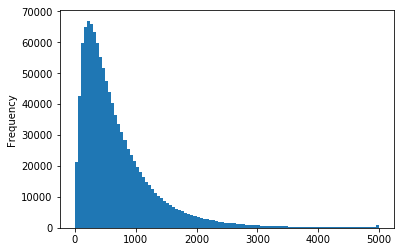

In [13]:
df['length'].plot(bins=100,kind='hist');

We can see that most of the revies are around 700 words

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
votes.cool,1125458.0,0.653370,1.712005,0.0,0.0,0.0,1.0,137.0
votes.funny,1125458.0,0.525080,1.633618,0.0,0.0,0.0,0.0,141.0
stars,1125458.0,3.737435,1.299347,1.0,3.0,4.0,5.0,5.0
votes.useful,1125458.0,1.132278,2.125121,0.0,0.0,0.0,1.0,166.0
length,1125457.0,696.257860,635.302528,1.0,270.0,512.0,912.0,5000.0


We can see that the maximum length of the text is 5000 words.Lets Display this review

In [15]:
df[df['length']==1]['text'].iloc[0]

'A'

Smallest Review contains only A

In [16]:
df[df['length']==5000]['text'].iloc[0]

'We had dinner at Hillstone a couple nights ago.  The food was, for the most part, pretty good.  However, the service was below average.  They really need to work on training their servers better or they will lose a lot of potential repeat business.   We showed up at 7:30 and our reservation was for 8pm.  We seated ourselves on the outdoor patio (which was very nice as far as scenery/ambience).  It was awhile before a server came over to take our drink orders; we saw her go by/near tables next to us twice before she finally came over.  She made us feel rushed from the get-go; as if she was in a hurry -- it was a little strange for the relaxed atmosphere and mode we were in.  She brought us our drinks - never offered water - and when she didn\'t come back for awhile, my husband got up to get me water from the bar.  She soon brought a check over and we at that point said we\'d like to order an appetizer.  Again, she seemed a little "put out" by us, but took the order.  When we were halfw

Now thats a really very big review :)

**Lets Look at the Start Columns**

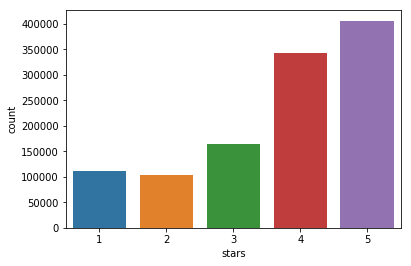

In [17]:
sns.countplot(x='stars',data=df);
#sns.countplot(y='stars',data=df);

We can see that there are more 5 start ratings in reviews.Thats Surprising.

Plott**ing the histogram of all the stars**

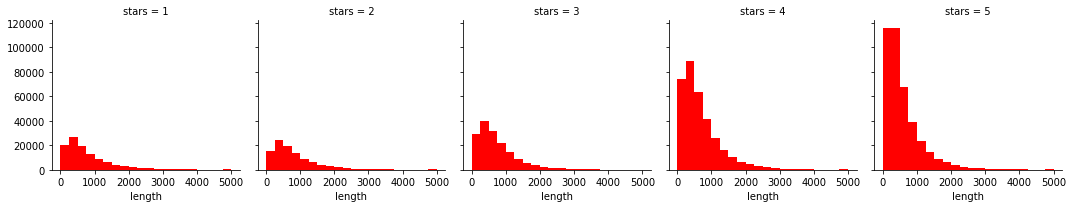

In [18]:
g=sns.FacetGrid(data=df,col='stars',col_wrap=5)
g.map(plt.hist,'length',bins=20,color='r');

Looking at the Histogram of Start 5 we can conclude that Generally ratings with 5 star are short

**Segregating Reviews with 1 and 5 star**

In [19]:
df_1=df[df['stars']==1]
df_1.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,length
5,Qrs3EICADUKNFoUq2iHStA,_ePLBPrkrf4bhyiKWEn4Qg,I don't know what Dr. Goldberg was like before...,0,vcNAWiLM4dR7D2nwwJ7nCA,0,1,2013-04-19,review,0,1143.0
37,6ViJPCbqIAIq5HPy7anIEw,IaONpXIHNtIBrmMU668OdQ,"Went here for lunch with two co-workers, check...",0,uGykseHzyS5xAMWoN6YUqA,0,1,2012-03-10,review,1,1314.0
56,TCqjsTEPFLfjdCxI2Zq1WQ,Hm4bXkXC3098K49bG2lIYg,They charge more than the services they provid...,0,oLctHIA1AxmsgOuu4dM6Vw,0,1,2008-10-18,review,2,169.0
57,QSRCc7ip7DqRnUT0gJ6q_g,Yp9-duCZtwUlrP8CXJwSxg,"To be fair, I am not yet a customer, so I cann...",0,oLctHIA1AxmsgOuu4dM6Vw,0,1,2009-01-16,review,3,3273.0
58,DVWIxcfkjxri5UruYABkrQ,PHcYOcb3Hf18FUPgysF-lQ,there should be a negative rating on here. on...,0,oLctHIA1AxmsgOuu4dM6Vw,0,1,2010-06-10,review,1,546.0


In [20]:
df_5=df[df['stars']==5]
df_5.head()

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,length
0,Xqd0DzHaiyRqVH3WRG7hzg,15SdjuK7DmYqUAj6rjGowg,dr. goldberg offers everything i look for in a...,1,vcNAWiLM4dR7D2nwwJ7nCA,0,5,2007-05-17,review,2,534.0
6,jE5xVugujSaskAoh2DRx3Q,kMu0knsSUFW2DZXqKkGWlg,Top notch doctor in a top notch practice. Can'...,0,vcNAWiLM4dR7D2nwwJ7nCA,0,5,2014-01-02,review,0,315.0
7,QnhQ8G51XbUpVEyWY2Km-A,onDPFgNZpMk-bT1zlForRA,Dr. Eric Goldberg is a fantastic doctor who ha...,0,vcNAWiLM4dR7D2nwwJ7nCA,0,5,2014-01-08,review,0,364.0
15,Au3Qs-AAZEWu2_4gIMwRgw,SSlO5u2nIJ8PoAKAgN5m3Q,"Yeah, thats right a five freakin star rating. ...",0,JwUE5GmEO-sH1FuwJgKBlQ,2,5,2011-12-29,review,5,1140.0
18,MPKMK36Xp0GuaWaXlUwZ8Q,rgM9f8Xh6ySclVoOSR8MXw,i rarely give five star reviews but for what t...,1,JwUE5GmEO-sH1FuwJgKBlQ,2,5,2012-02-13,review,4,964.0


In [21]:
df_1_5=pd.concat([df_1,df_5])
df_1_5.shape

(516817, 11)

In [22]:
df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516817 entries, 5 to 1125454
Data columns (total 11 columns):
user_id         516817 non-null object
review_id       516817 non-null object
text            516816 non-null object
votes.cool      516817 non-null int64
business_id     516817 non-null object
votes.funny     516817 non-null int64
stars           516817 non-null int64
date            516817 non-null object
type            516817 non-null object
votes.useful    516817 non-null int64
length          516816 non-null float64
dtypes: float64(1), int64(4), object(6)
memory usage: 47.3+ MB


In [23]:
print('1-Star Review Percentage=',(len(df_1)/len(df_1_5))*100,'%')

1-Star Review Percentage= 21.433505476793528 %


In [24]:
print('5-Star Review Percentage=',(len(df_5)/len(df_1_5))*100,'%')

5-Star Review Percentage= 78.56649452320647 %


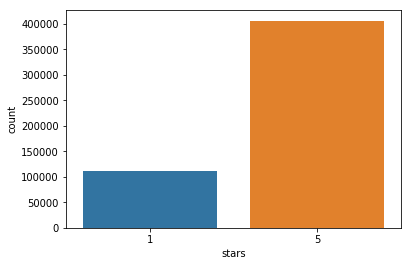

In [25]:
sns.countplot(x=df_1_5['stars'],label='Count');

**Creating Testing and Training Data**

**Exercise to remove Puncuation**

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
Test='Hello Mr. Future,I am so happy to be learning AI'

In [28]:
Test_punc_removed=[char  for char in Test if char not in string.punctuation]
Test_punc_removed

['H',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'M',
 'r',
 ' ',
 'F',
 'u',
 't',
 'u',
 'r',
 'e',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 's',
 'o',
 ' ',
 'h',
 'a',
 'p',
 'p',
 'y',
 ' ',
 't',
 'o',
 ' ',
 'b',
 'e',
 ' ',
 'l',
 'e',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 'A',
 'I']

In [29]:
Test_punc_removed_join=''.join(Test_punc_removed)

In [30]:
Test_punc_removed_join

'Hello Mr FutureI am so happy to be learning AI'

**Exercise to remove STOPWORDS**

In [31]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Prited above are the list of Stop Words in the nltk library

In [32]:
Test_punc_removed_join_clean=[word  for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
Test_punc_removed_join_clean

['Hello', 'Mr', 'FutureI', 'happy', 'learning', 'AI']

So we have managed to remove stop words from out list

In [33]:
mini_challenge='Here is a mini challenge,that will teach you how to remove stopwords and puncutations'

In [34]:
challenge=[char for char in mini_challenge if char not in string.punctuation  ]
challenge=''.join(challenge)
challenge=[word  for word in challenge.split() if word.lower() not in stopwords.words('english')]

In [35]:
challenge

['mini', 'challengethat', 'teach', 'remove', 'stopwords', 'puncutations']

**Exercise Count Vectoriser**

In [36]:
sample_data=['This is the first document.','This is thesecond document.','This is the third document']
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(sample_data)

In [37]:
print(vectorizer.get_feature_names())

['document', 'first', 'is', 'the', 'thesecond', 'third', 'this']


In [38]:
print(X.toarray())

[[1 1 1 1 0 0 1]
 [1 0 1 0 1 0 1]
 [1 0 1 1 0 1 1]]


In [39]:
mini_challenge=['Hello World','Hello Hello World','Hello World world world']
vectorizer_challenge=CountVectorizer()
X_challenge=vectorizer_challenge.fit_transform(mini_challenge)
print(X_challenge.toarray())

[[1 1]
 [2 1]
 [1 3]]


R**emoving Puncuation,Stop words and Appling Count Vectorizer to the dataset**

In [40]:
df_1_5

,user_id,review_id,text,votes.cool,business_id,votes.funny,stars,date,type,votes.useful,length
5,Qrs3EICADUKNFoUq2iHStA,_ePLBPrkrf4bhyiKWEn4Qg,I don't know what Dr. Goldberg was like before...,0,vcNAWiLM4dR7D2nwwJ7nCA,0,1,2013-04-19,review,0,1143.0
37,6ViJPCbqIAIq5HPy7anIEw,IaONpXIHNtIBrmMU668OdQ,"Went here for lunch with two co-workers, check...",0,uGykseHzyS5xAMWoN6YUqA,0,1,2012-03-10,review,1,1314.0
56,TCqjsTEPFLfjdCxI2Zq1WQ,Hm4bXkXC3098K49bG2lIYg,They charge more than the services they provid...,0,oLctHIA1AxmsgOuu4dM6Vw,0,1,2008-10-18,review,2,169.0
57,QSRCc7ip7DqRnUT0gJ6q_g,Yp9-duCZtwUlrP8CXJwSxg,"To be fair, I am not yet a customer, so I cann...",0,oLctHIA1AxmsgOuu4dM6Vw,0,1,2009-01-16,review,3,3273.0
58,DVWIxcfkjxri5UruYABkrQ,PHcYOcb3Hf18FUPgysF-lQ,there should be a negative rating on here. on...,0,oLctHIA1AxmsgOuu4dM6Vw,0,1,2010-06-10,review,1,546.0
...,...,...,...,...,...,...,...,...,...,...,...
1125450,AnH84g9V10x41CXmCvcaFg,4ffWpUCyITEgZEGGyZWhbA,My new favorite restaurant. They have 22 diff...,0,BMjggIgOghBMEXPo8q7q3w,0,5,2014-07-10,review,2,510.0
1125451,pslJujFe9XO28lMm8izNtg,vZVRzaoK2Z6C0-pd0YV9nw,GreAt food awesome service . The best fish in ...,0,BMjggIgOghBMEXPo8q7q3w,0,5,2014-07-16,review,0,170.0
1125452,ZVkaYRCTFSSt-Ch9uwigOQ,FOIB5Cx_iIY-FWKMH45VRw,Walking into this place looks nice and well ke...,1,BMjggIgOghBMEXPo8q7q3w,0,5,2014-07-16,review,0,734.0
1125453,lhMo-dGq0V2iKqBIiwUJSg,eujuvkGqy2ssZ9zjdPJrMA,"Located at the bottom of Lauriston Place, this...",0,BVxlrYWgmi-8TPGMe6CTpg,0,5,2010-08-11,review,1,714.0


In [41]:
df_1_5 = df_1_5.reset_index()
df_1_5.shape

(516817, 12)

In [42]:
#df_1_5.drop(df_1_5.loc[0:516818].index, inplace=True)   # Considering only first 10000 reviews
#df_1_5.shape

In [43]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation ]
    Test_punc_removed_join=''.join(Test_punc_removed)
    Test_punc_removed_join_clean=[ word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [44]:
df_clean=df_1_5['text'].apply(message_cleaning)

TypeError: 'float' object is not iterable

In [45]:
"""#test_strs = ['THIS IS A TEST!', 'another test', 'JUS!*(*UDFLJ)']
df = pd.DataFrame(df_1_5, columns=['text'])
df_clean = df.apply(lambda x: message_cleaning(x.text), axis=1)"""

"#test_strs = ['THIS IS A TEST!', 'another test', 'JUS!*(*UDFLJ)']\ndf = pd.DataFrame(df_1_5, columns=['text'])\ndf_clean = df.apply(lambda x: message_cleaning(x.text), axis=1)"

In [46]:
"""#test_strs = ['THIS IS A TEST!', 'another test', 'JUS!*(*UDFLJ)']
df = pd.DataFrame(test_strs, columns=['text'])
df['new_text'] = df.apply(lambda x: clean(x.text), axis=1)"""

"#test_strs = ['THIS IS A TEST!', 'another test', 'JUS!*(*UDFLJ)']\ndf = pd.DataFrame(test_strs, columns=['text'])\ndf['new_text'] = df.apply(lambda x: clean(x.text), axis=1)"

In [47]:
#df_clean=df_1_5['text'].apply(message_cleaning)

In [48]:
print(df_clean[0]) # cleaned up review 

NameError: name 'df_clean' is not defined

In [49]:
print(df_1_5['text'][0]) # Original review

I don't know what Dr. Goldberg was like before  moving to Arizona, but let me tell you, STAY AWAY from this doctor and this office. I was going to Dr. Johnson before he left and Goldberg took over when Johnson left. He is not a caring doctor. He is only interested in the co-pay and having you come in for medication refills every month. He will not give refills and could less about patients's financial situations. Trying to get your 90 days mail away pharmacy prescriptions through this guy is a joke. And to make matters even worse, his office staff is incompetent. 90% of the time when you call the office, they'll put you through to a voice mail, that NO ONE ever answers or returns your call. Both my adult children and husband have decided to leave this practice after experiencing such frustration. The entire office has an attitude like they are doing you a favor. Give me a break! Stay away from this doc and the practice. You deserve better and they will not be there when you really need

**Applying Count Vectoriser to the data**

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer=message_cleaning)
df_countvectorizer=vectorizer.fit_transform(df_1_5['text'])

ValueError: np.nan is an invalid document, expected byte or unicode string.

In [51]:
print(vectorizer.get_feature_names())

NotFittedError: CountVectorizer - Vocabulary wasn't fitted.

In [52]:
print(df_countvectorizer.toarray())

NameError: name 'df_countvectorizer' is not defined

In [53]:
df_countvectorizer.shape

NameError: name 'df_countvectorizer' is not defined

**Model Training **

In [54]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
label=df_1_5['stars'].values

In [55]:
df_1_5['stars'].values

array([1, 1, 1, ..., 5, 5, 5])

In [56]:
NB_classifier.fit(df_countvectorizer,label)

NameError: name 'df_countvectorizer' is not defined

In [57]:
testing_sample=['amazing food! highly recommended']
testing_sample_countvectorizer=vectorizer.transform(testing_sample)
test_predict=NB_classifier.predict(testing_sample_countvectorizer)
test_predict

NotFittedError: CountVectorizer - Vocabulary wasn't fitted.

**Dividing the data into test train split**

In [58]:
X=df_countvectorizer
X.shape

NameError: name 'df_countvectorizer' is not defined

In [59]:
y=label
y.shape

(516817,)

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test,y_test=train_test_split(X,y,test_size=0.2)

ValueError: Found input variables with inconsistent numbers of samples: [3, 516817]

In [61]:
X_train.shape

NameError: name 'X_train' is not defined

In [62]:
y_train.shape

NameError: name 'y_train' is not defined

In [63]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier=MultinomialNB()
NB_classifier.fit(X_train,y_train)

NameError: name 'X_train' is not defined

**Evaluating the Model**

In [64]:
from sklearn.metrics import classification_report,confusion_matrix
y_predict_train=NB_classifier.predict(X_train)
y_predict_train

NameError: name 'X_train' is not defined

In [65]:
cm=confusion_matrix(y_train,y_predict_train)
sns.heatmap(cm,annot=True)

NameError: name 'y_train' is not defined

In [66]:
y_predict_test=NB_classifier.predict(X_test)
y_predict_test
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

NameError: name 'X_test' is not defined

In [67]:
print(classification_report(y_test,y_predict_test))

NameError: name 'y_test' is not defined